<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Participant_ID             60 non-null     object 
 1   Sleep_Hours                55 non-null     object 
 2   Sleep_Quality_Score        60 non-null     int64  
 3   Daytime_Sleepiness         60 non-null     int64  
 4   Stroop_Task_Reaction_Time  60 non-null     float64
 5   N_Back_Accuracy            60 non-null     float64
 6   Emotion_Regulation_Score   60 non-null     int64  
 7   PVT_Reaction_Time          60 non-null     float64
 8   Age                        55 non-null     object 
 9   Gender                     55 non-null     object 
 10  BMI                        55 non-null     float64
 11  Caffeine_Intake            60 non-null     int64  
 12  Physical_Activity_Level    60 non-null     int64  
 13  Stress_Level               60 non-null     int64  
dtypes

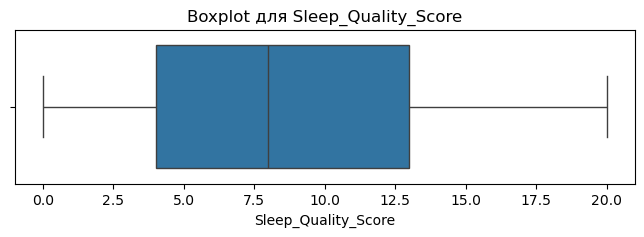

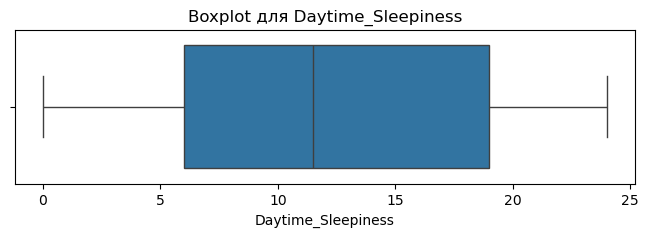

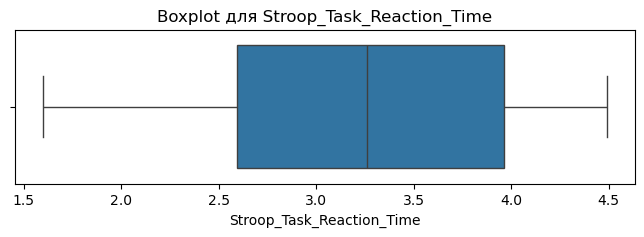

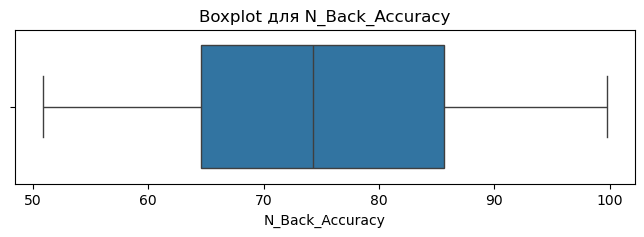

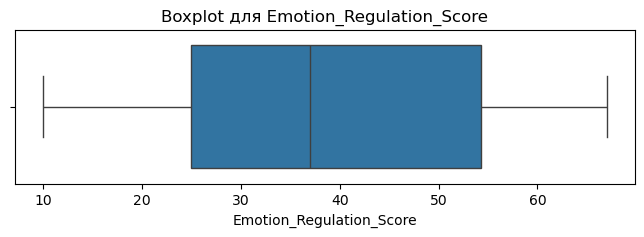

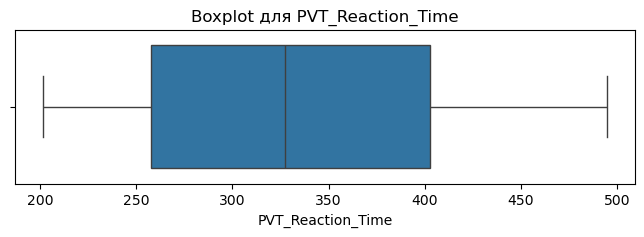

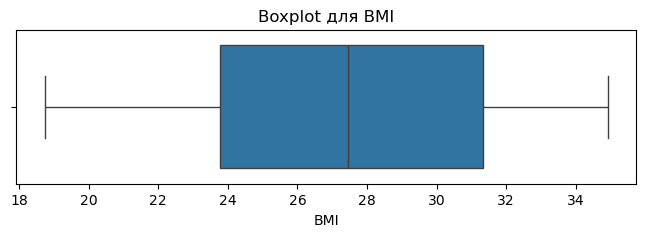

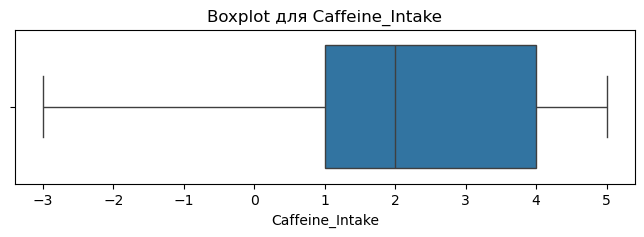

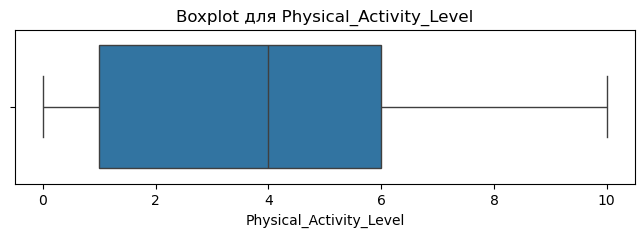

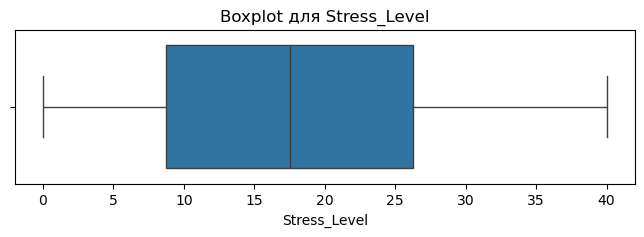

In [1]:

import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
!pip install streamlit pandas scikit-learn matplotlib seaborn

# Пути к файлам
input_path = Path("sleep_deprivation_unprepared.csv")
output_path = Path("cleaned_data.csv")

# Загрузка и очистка данных
df = pd.read_csv(input_path)
df = df.drop_duplicates()

# EDA
df.head()
df.info()

# Поиск выбросов по всем числовым столбцам
numeric_columns = df.select_dtypes(include='number').columns
for col in numeric_columns:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot для {col}")
    plt.show()


In [2]:
# Дополнительная очистка данных
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Sleep_Hours'] = pd.to_numeric(df['Sleep_Hours'], errors='coerce')
df = df.dropna(subset=['Sleep_Hours'])
df = df[df['Caffeine_Intake'] >= 0]
df['BMI_Low'] = (df['BMI'] < 18.5).astype(int)
df['BMI_Normal'] = ((df['BMI'] >= 18.5) & (df['BMI'] < 25)).astype(int)
df['BMI_High'] = (df['BMI'] >= 30).astype(int)
df = df.dropna()
df.to_csv(output_path, index=False)

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 1 to 59
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Participant_ID             39 non-null     object 
 1   Sleep_Hours                39 non-null     float64
 2   Sleep_Quality_Score        39 non-null     int64  
 3   Daytime_Sleepiness         39 non-null     int64  
 4   Stroop_Task_Reaction_Time  39 non-null     float64
 5   N_Back_Accuracy            39 non-null     float64
 6   Emotion_Regulation_Score   39 non-null     int64  
 7   PVT_Reaction_Time          39 non-null     float64
 8   Age                        39 non-null     float64
 9   Gender                     39 non-null     object 
 10  BMI                        39 non-null     float64
 11  Caffeine_Intake            39 non-null     int64  
 12  Physical_Activity_Level    39 non-null     int64  
 13  Stress_Level               39 non-null     int64  
 14  B

,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level,BMI_Low,BMI_Normal,BMI_High
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0,39.000000,39.000000
mean,5.877949,7.333333,11.923077,3.402564,75.251538,37.641026,350.945128,30.153846,27.497436,2.538462,3.897436,17.974359,0.0,0.358974,0.358974
std,1.948152,5.681611,8.180158,0.766248,13.686222,16.664629,87.382861,8.658851,4.546064,1.699011,3.393452,10.596641,0.0,0.485971,0.485971
min,3.210000,0.000000,0.000000,1.790000,52.180000,10.000000,211.650000,18.000000,19.280000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000
25%,4.100000,2.000000,4.500000,2.705000,64.625000,25.000000,279.160000,21.500000,24.190000,1.000000,1.000000,10.000000,0.0,0.000000,0.000000
50%,5.740000,7.000000,11.000000,3.540000,74.340000,35.000000,332.710000,29.000000,27.280000,3.000000,3.000000,18.000000,0.0,0.000000,0.000000
75%,7.680000,12.000000,19.000000,4.060000,85.750000,45.500000,421.110000,38.000000,30.845000,4.000000,6.500000,25.500000,0.0,1.000000,1.000000
max,8.820000,19.000000,24.000000,4.490000,99.730000,67.000000,494.550000,43.000000,34.930000,5.000000,10.000000,39.000000,0.0,1.000000,1.000000


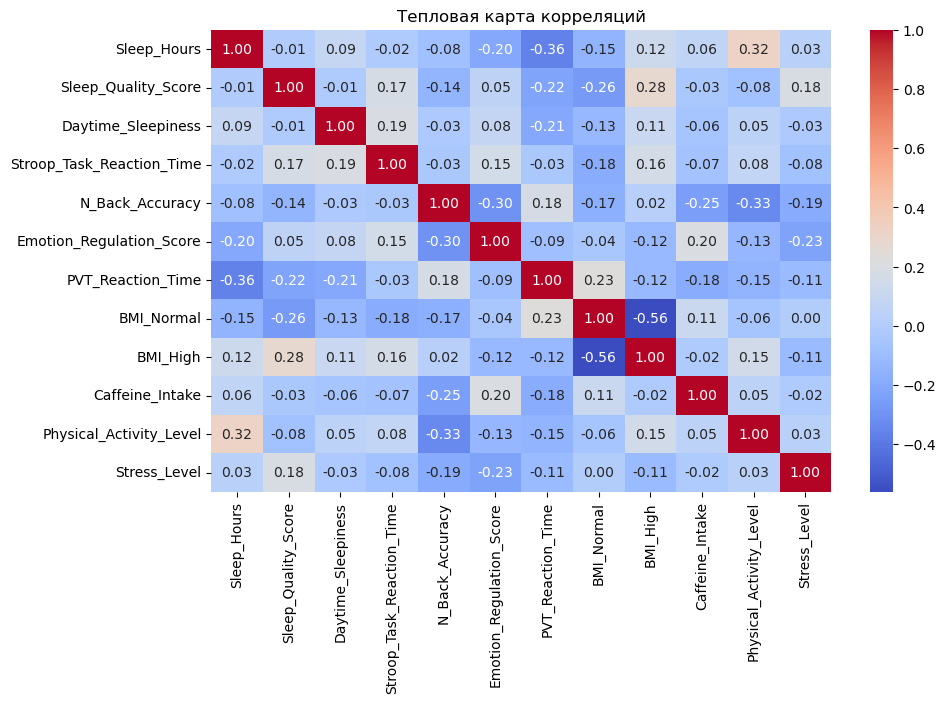

In [3]:
# Корреляционная матрица
corr = df[['Sleep_Hours', 'Sleep_Quality_Score', 'Daytime_Sleepiness',
           'Stroop_Task_Reaction_Time', 'N_Back_Accuracy', 'Emotion_Regulation_Score',
           'PVT_Reaction_Time', 'BMI_Normal', 'BMI_High', 'Caffeine_Intake',
           'Physical_Activity_Level', 'Stress_Level']].corr()

# Построение тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляций")
plt.show()


Основные закономерности:
1. Отрицательная корреляция между Sleep_Hours и PVT_Reaction_time (-0.36): чем больше человек спит, тем быстрее его реакция
2. Отрицательная корреляция между Physical_Activity_level и N_Bank_Accuracy (-0.33): чем больше физическая активность, тем хуже у человека рабочая память и внимание
3. Отрицательная корреляция между BMI_Normal и Sleep_Quality_Score (-0.26): у людей с нормальной массой тела хуже качество сна
4. Отрицательная корреляция между Caffeine_Intake и N_Back_Accuracy (-0.25): чем больше выпитых кружек кофе в день, тем хуже рабочая память и внимание
5. Положительная корреляция между Physical_Activity_level и Sleep_hours (0.32): чем больше физической активности, тем больше часов сна
6. Положительная корреляция между BMI_High и Sleep_Quality_Score (0.28): чем выше масса тела (выше нормы), тем лучше качество сна

Помимо достаточно очевидных закономерностей получились некоторые противоречия:
 - чем больше физическая активность, тем хуже у человека рабочая память и внимание
 - у людей с нормальной массой тела хуже качество сна
 - чем выше масса тела (выше нормы), тем лучше качество сна



Рассмотрим эту закономерность:
чем больше физическая активность, тем хуже у человека рабочая память и внимание

Гипотеза: Возможно, высокая физнагрузка вызывает утомление и временное снижение внимания


Попробую сгруппировать людей по физической активности и затем сравнить из по показателям N_Back_Accuracy


C:\Users\Polina\AppData\Local\Temp\ipykernel_9024\1741727440.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Activity_Level_Group', y='N_Back_Accuracy', palette='pastel')


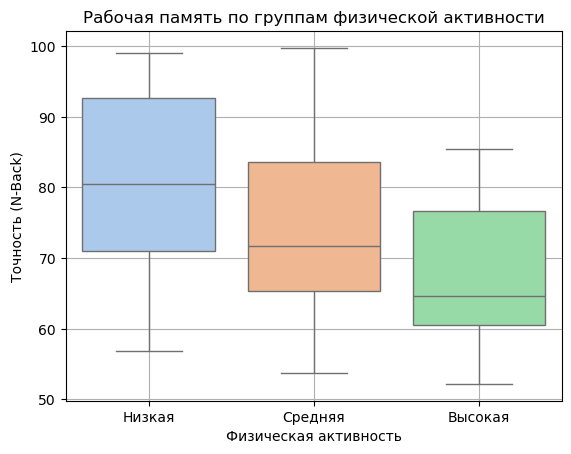

In [6]:
df['Activity_Level_Group'] = pd.cut(df['Physical_Activity_Level'],
                                    bins=[-1, 3, 6, 10],
                                    labels=['Низкая', 'Средняя', 'Высокая'])

sns.boxplot(data=df, x='Activity_Level_Group', y='N_Back_Accuracy', palette='pastel')
plt.title("Рабочая память по группам физической активности")
plt.xlabel("Физическая активность")
plt.ylabel("Точность (N-Back)")
plt.grid(True)
plt.show()



Действительно, у высокоактивных точность ниже всего. Проверим для начала связь активность - утомление, потом 
утомление - N-Back, чтобы подтвердить гипотезу. Для этого построю регрессионную модель:


In [8]:
import statsmodels.api as sm

X = df[['Physical_Activity_Level']]
X = sm.add_constant(X)
y = df['Daytime_Sleepiness']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Daytime_Sleepiness   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                   0.08907
Date:                Wed, 04 Jun 2025   Prob (F-statistic):              0.767
Time:                        09:50:58   Log-Likelihood:                -136.75
No. Observations:                  39   AIC:                             277.5
Df Residuals:                      37   BIC:                             280.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     


Вывод: Гипотеза о том, что высокая физическая активность вызывает утомление (сонливость), 
не подтверждается. Модель показывает отсутствие статистически значимой связи
Проверю, остаётся ли связь при контроле других переменных


In [10]:
X = df[['Physical_Activity_Level', 'Sleep_Hours', 'Stress_Level', 'Caffeine_Intake']]
X = sm.add_constant(X)
y = df['N_Back_Accuracy']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        N_Back_Accuracy   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     2.124
Date:                Wed, 04 Jun 2025   Prob (F-statistic):             0.0992
Time:                        09:50:58   Log-Likelihood:                -152.52
No. Observations:                  39   AIC:                             315.0
Df Residuals:                      34   BIC:                             323.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     


Это значит, что физ. нагрузка влияет напрямую и, скорее всего, медиаторов в этой связи нет.

Попробуем исследовать субгруппы.
Для этого проведу многофакторную сегментацию, а затем - проверю N-Back Accuracy внутри каждой 


In [12]:
# Создам группировочные переменные

# По физической активности
df['Activity_Group'] = pd.cut(
    df['Physical_Activity_Level'],
    bins=[-0.1, 5, 11],
    labels=['Низкая', 'Высокая']
)

# По уровню стресса
df['Stress_Group'] = pd.cut(
    df['Stress_Level'],
    bins=[0, 20, 40],
    labels=['Низкий стресс', 'Высокий стресс']
)

# По возрастным группам
df['Age_Group'] = pd.cut(
    df['Age'],
    bins=[0, 17, 25, 45, 100],
    labels=['Подростки', 'Молодые', 'Взрослые', 'Пожилые']
)

# Объединим все признаки в одну колонку
df['Subgroup'] = (
    df['Activity_Group'].astype(str) + ' | ' +
    df['Stress_Group'].astype(str) + ' | ' +
    df['Gender'].astype(str) + ' | ' +
    df['Age_Group'].astype(str)
)

# Проверим среднее N-Back Accuracy по группам
group_accuracy = df.groupby('Subgroup')['N_Back_Accuracy'].mean().sort_values(ascending=False)
print(group_accuracy)


Subgroup
Высокая | Высокий стресс | Female | Взрослые    99.730000
Низкая | Низкий стресс | Male | Молодые         96.500000
Низкая | Низкий стресс | Female | Молодые       87.500000
Низкая | Низкий стресс | Female | Взрослые      84.956667
Низкая | Высокий стресс | Male | Взрослые       82.452500
Высокая | Низкий стресс | Female | Взрослые     78.600000
Низкая | Высокий стресс | Female | Молодые      77.280000
Высокая | Низкий стресс | Male | Молодые        74.435000
Высокая | Низкий стресс | Female | Молодые      73.500000
Высокая | Низкий стресс | Male | Взрослые       71.126667
Низкая | Низкий стресс | Male | Взрослые        70.426250
Низкая | Высокий стресс | Male | Молодые        69.050000
Высокая | Высокий стресс | Male | Молодые       64.625000
Низкая | Высокий стресс | Female | Взрослые     61.055000
Высокая | Высокий стресс | Male | Взрослые      56.535000
Name: N_Back_Accuracy, dtype: float64


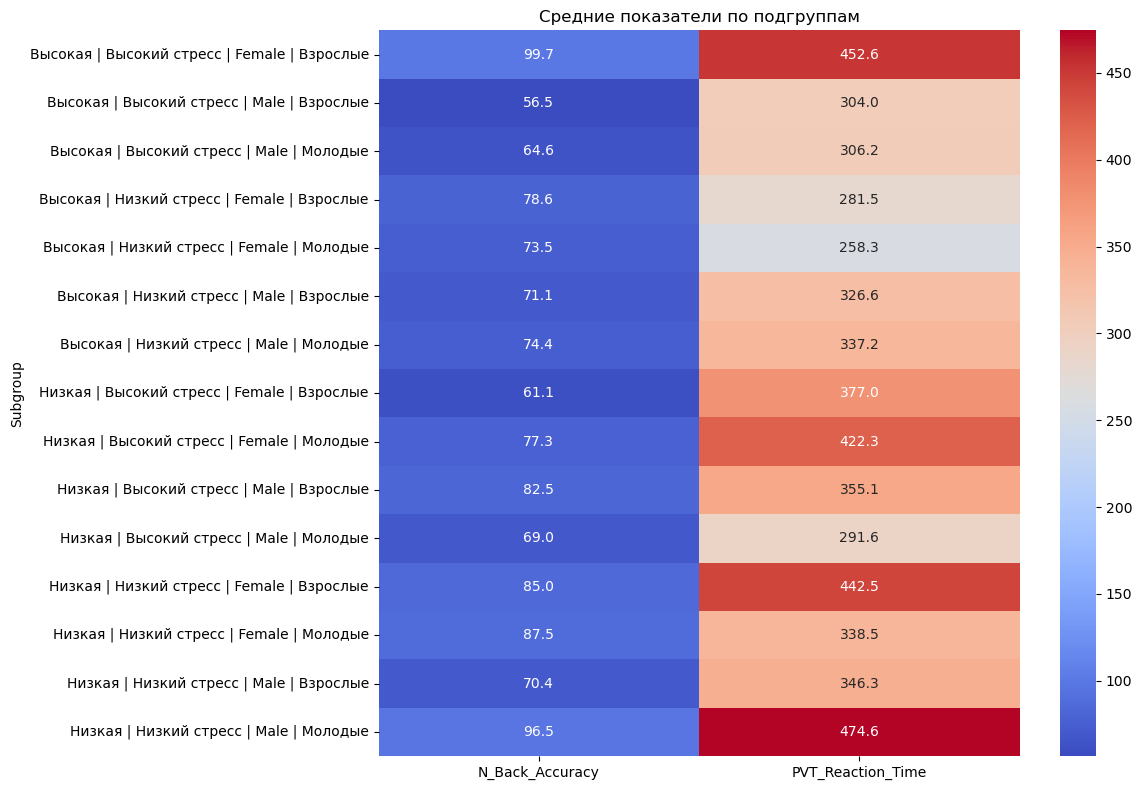

In [13]:
grouped = df.groupby('Subgroup')[[
    'N_Back_Accuracy', 'PVT_Reaction_Time'
]].mean()

plt.figure(figsize=(12, 8))
sns.heatmap(grouped, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Средние показатели по подгруппам")
plt.tight_layout()
plt.show()



Промежуточный вывод:
Гипотеза о том, что высокая физическая активность ухудшает внимание через утомление — не подтвердилась.  
Регрессионный анализ не выявил связи между активностью и сонливостью.  
При этом сохраняется прямая отрицательная связь между активностью и точностью внимания (N_Back_Accuracy).  

Однако анализ подгрупп показал, что в некоторых сочетаниях (например, у женщин с высоким уровнем активности и 
стресса) внимание даже выше среднего.  
Это позволяет предположить, что влияние физической активности неоднородно и может зависеть от личных 
и контекстных факторов.



Следующее противоречие:
- у людей с нормальной массой тела хуже качество сна
- чем выше масса тела (выше нормы), тем лучше качество сна 


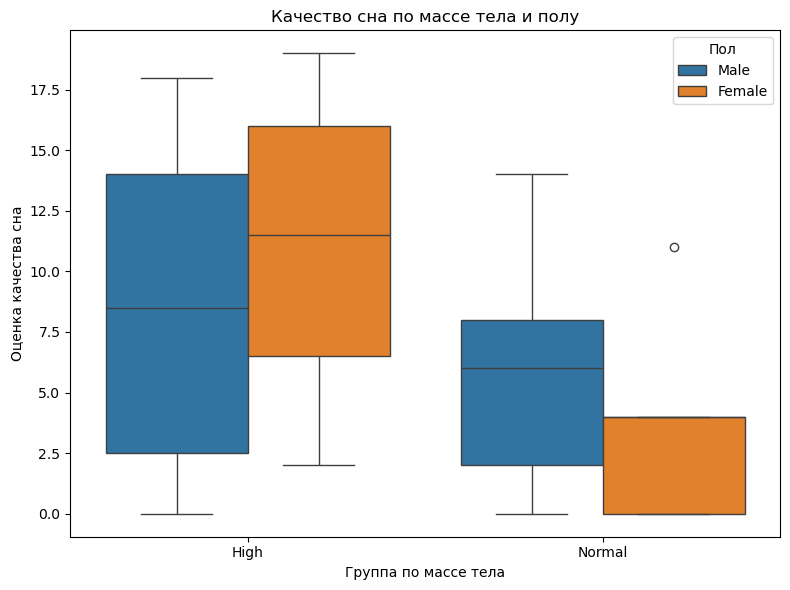

In [26]:
# Создание категориальной переменной BMI_Group
def get_bmi_group(row):
    if row['BMI_High'] == 1:
        return 'High'
    elif row['BMI_Normal'] == 1:
        return 'Normal'

df['BMI_Group'] = df.apply(get_bmi_group, axis=1)

# Построение boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='BMI_Group', y='Sleep_Quality_Score', hue='Gender')
plt.title("Качество сна по массе тела и полу")
plt.xlabel("Группа по массе тела")
plt.ylabel("Оценка качества сна")
plt.legend(title="Пол")
plt.tight_layout()
plt.show()


У людей с высоким BMI (избыточный вес):
  -  Качество сна выше, чем у тех, у кого вес в норме. Это верно как для мужчин, так и для женщин
  -  В целом, мужчины спят лучше, чем женщины


In [ ]:
features = ['Stress_Level', 'Caffeine_Intake', 'Physical_Activity_Level', 'Sleep_Hours']

for feature in features:
    plt.figure(figsize=(7, 5))
    sns.boxplot(data=df, x='Gender', y=feature, palette='Set2')
    plt.title(f'{feature} по полу')
    plt.xlabel("Пол")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()



То есть, на такой результат, скорее всего, повлияло то, что: 
- мужчины испытывают в среднем больше стресса, чем женщины, поэтому могут сильнее утомляться; 
- женщины пьют кофе больше, поэтому их качество сна хуже; 
- у мужчин больше физическая активность - они больше устают; 
- и у женщин в среднем намного меньше часов сна - меньше нормы, когда у мужчин в среднем 6 часов. 

Из этого можно понять, почему может возникать разница в качестве сна между мужчинами и женщинами. 


In [ ]:
import statsmodels.api as sm

for gender in ['Male', 'Female']:
    sub = df[df['Gender'] == gender][['BMI_Group', 'Sleep_Quality_Score']].dropna()

    X = pd.get_dummies(sub['BMI_Group'], drop_first=True)
    X = sm.add_constant(X)
    y = sub['Sleep_Quality_Score']

    # Приводим типы к float
    X = X.astype(float)
    y = y.astype(float)

    model = sm.OLS(y, X).fit()
    print(f"\nРегрессия для пола: {gender}")
    print(model.summary())




Я попробовала объяснить теперь зависимость массы тела и качества сна, но хотя корреляции в данных указывали на 
возможную связь между массой тела и качеством сна, регрессионный анализ не подтвердил статистически значимых 
различий. Возможно, наблюдаемая связь обусловлена другими факторами или случайна. Эта гипотеза не получила 
убедительного подтверждения


**Попробую создать интерактивный дашборд на Streamlit, где пользователь сможет ввести свои данные, получить возможные предсказанные моделью его когнитивные показатели и затем получить рекоммендации по их улучшению.**

Для этого сначала найду такие комбинации часов сна, выпитых чашек кофе и часов физической активности, которые оптимизируют качество сна, время реакции, рабочую память и внимание.


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Загружаем данные
df = pd.read_csv("updated_data.csv")

# Выбираем признаки и целевые переменные
features = ['Sleep_Hours', 'Caffeine_Intake', 'Physical_Activity_Level', 'BMI', 'Age']
targets = ['PVT_Reaction_Time', 'N_Back_Accuracy', 'Stroop_Task_Reaction_Time']

# Удалим строки с пропущенными значениями
df = df.dropna(subset=features + targets)

# Делим данные
X = df[features]
y = df[targets]

# Стандартизация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Обучаем модели Ridge для каждого таргета
models = {}
for col in y.columns:
    model = Ridge(alpha=1.0)
    model.fit(X_scaled, y[col])
    models[col] = model

# Генерация комбинаций для предсказания
sleep_range = np.linspace(3, 10, 20)
coffee_range = np.linspace(0, 5, 10)
activity_range = np.linspace(0, 10, 10)

# Фиксируем возраст и BMI
age = 30
bmi = 22

grid = []
for sleep in sleep_range:
    for coffee in coffee_range:
        for activity in activity_range:
            grid.append([sleep, coffee, activity, bmi, age])

df_grid = pd.DataFrame(grid, columns=features)

# Масштабируем новые данные
X_grid_scaled = scaler.transform(df_grid)

# Предсказания по каждой модели
for target in targets:
    df_grid[target] = models[target].predict(X_grid_scaled)

# Вывод лучших комбинаций по памяти (например)
top_combos = df_grid.sort_values(by='N_Back_Accuracy', ascending=False).head(10)
print(top_combos[['Sleep_Hours', 'Caffeine_Intake', 'Physical_Activity_Level', 'N_Back_Accuracy']])

In [ ]:

#Создадим файл app.py и вставим код

code = """import streamlit as st
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Заголовок
st.title("Оценка когнитивных показателей")

st.markdown("Введите свои данные, чтобы получить прогноз когнитивных показателей и рекомендации.")

# Ввод данных
age = st.number_input("Возраст", min_value=10, max_value=100, step=1)
gender = st.selectbox("Пол", ["Male", "Female"])
height_cm = st.number_input("Рост (в см)", min_value=100, max_value=250, step=1)
weight_kg = st.number_input("Вес (в кг)", min_value=30, max_value=200, step=1)
sleep_hours = st.slider("Количество часов сна в сутки", 0.0, 12.0, 7.0, step=0.1)
caffeine = st.slider("Кофеин (кол-во кружек кофе в день)", 0, 10, 2)
activity = st.slider("Физическая активность (часы в неделю)", 0.0, 20.0, 3.0, step=0.5)

# Вычисление BMI
height_m = height_cm / 100
bmi = weight_kg / (height_m ** 2)
bmi_category = "Нормальный"
if bmi < 18.5:
    bmi_category = "Недовес"
elif bmi > 25:
    bmi_category = "Избыточный"

st.markdown(f"**Ваш ИМТ (BMI):** {bmi:.1f} — *{bmi_category}*")

# Создание DataFrame
X_input = pd.DataFrame({
    "Sleep_Hours": [sleep_hours],
    "Caffeine_Intake": [caffeine],
    "Physical_Activity_Level": [activity],
    "BMI": [bmi],
    "Age": [age]
})

# Подготовка модели (упрощённо: обучаем в коде)
# Пример обучающих данных — подменить своими в рабочем приложении
X_fake = pd.DataFrame({
    "Sleep_Hours": np.random.uniform(4, 9, 100),
    "Caffeine_Intake": np.random.randint(0, 6, 100),
    "Physical_Activity_Level": np.random.uniform(0, 10, 100),
    "BMI": np.random.uniform(18, 35, 100),
    "Age": np.random.randint(18, 65, 100)
})

y_fake = pd.DataFrame({
    "Daytime_Sleepiness": np.random.uniform(0, 24, 100),
    "Stroop_Task_Reaction_Time": np.random.uniform(2, 5, 100),
    "N_Back_Accuracy": np.random.uniform(50, 100, 100),
    "PVT_Reaction_Time": np.random.uniform(250, 500, 100)
})

# Масштабируем
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_fake)
X_input_scaled = scaler.transform(X_input)

# Обучаем модели
models = {
    'Daytime_Sleepiness': Ridge().fit(X_scaled, y_fake['Daytime_Sleepiness']),
    'Stroop': Ridge().fit(X_scaled, y_fake['Stroop_Task_Reaction_Time']),
    'N_Back': Ridge().fit(X_scaled, y_fake['N_Back_Accuracy']),
    'PVT': Ridge().fit(X_scaled, y_fake['PVT_Reaction_Time'])
}

# Предсказания
preds = {name: model.predict(X_input_scaled)[0] for name, model in models.items()}

# Вывод
st.subheader("Предполагаемые когнитивные показатели:")
st.write(f"**Дневная сонливость:** {preds['Daytime_Sleepiness']:.1f}")
st.write(f"**Время реакции (Stroop):** {preds['Stroop']:.2f} сек")
st.write(f"**Точность памяти (N-Back Accuracy):** {preds['N_Back']:.1f}%")
st.write(f"**Время реакции (PVT):** {preds['PVT']:.0f} мс")

# Рекомендации
st.subheader("💬 Рекомендации:")

all_ok = True

# Сон
if sleep_hours < 6:
    st.warning("Вы спите меньше 6 часов. Увеличьте продолжительность сна до 6–9 часов для лучшей концентрации и реакции.")
    all_ok = False
elif sleep_hours > 9:
    st.warning("Вы спите больше 9 часов. Слишком длинный сон может вызывать вялость. Старайтесь спать 6–9 часов.")
    all_ok = False

# ИМТ
if bmi_category == "Недовес":
    st.warning("Ваш вес ниже нормы. Попробуйте откорректировать рацион или проконсультироваться со специалистом.")
    all_ok = False
elif bmi_category == "Избыточный":
    st.warning("Ваш вес выше нормы. Оптимальный BMI — 18.5–25.")
    all_ok = False

# Кофеин
if caffeine > 3:
    st.warning("Вы пьёте много кофе. Ограничьте потребление до 1–3 кружек в день — это может улучшить качество сна.")
    all_ok = False

# Физическая активность
if activity < 2:
    st.warning("Низкая физическая активность. Рекомендуется минимум 2–6 часов активности в неделю для улучшения сна и когнитивных функций.")
    all_ok = False


if all_ok:
    st.success("Все ключевые параметры в хорошем диапазоне! Ваши показатели, скорее всего, находятся на оптимальном уровне.")


"""

# Записываем код в файл app.py
with open("app.py", "w", encoding="utf-8") as f:
    f.write(code)

print("Файл app.py создан")

